In [140]:
# Importing Libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
# Loading the Datasets

test = pd.read_csv('Boston_test.csv')
train = pd.read_csv('Boston_train.csv')
test.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
train.drop(columns=['Unnamed: 0'], axis=0, inplace=True)

In [142]:
# statistical info
train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [143]:
# datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


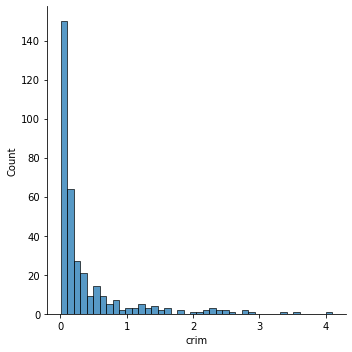

In [144]:
sns.displot(train['crim']) 

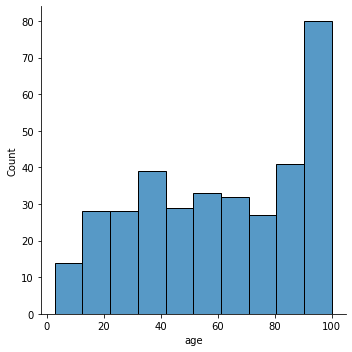

In [145]:
 sns.displot(train['age']) 

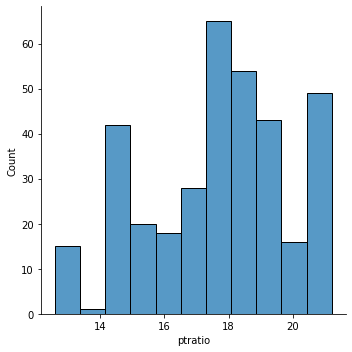

In [146]:
 sns.displot(train['ptratio']) 

In [147]:
train_len = len(train)
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)

In [148]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [149]:
 df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [150]:
# Preprocessing 

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<AxesSubplot:>

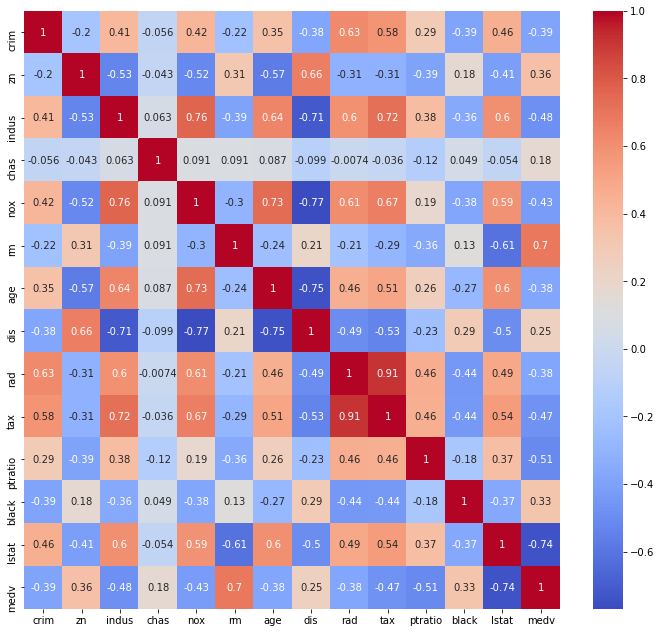

In [151]:
# Coorelation Matrix
corr = df.corr()
plt.figure(figsize=(12, 11))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [152]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [153]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


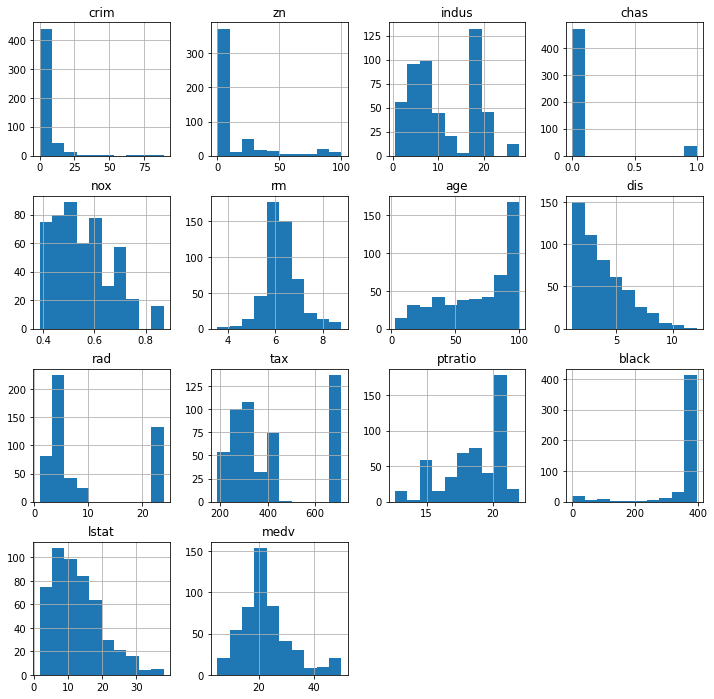

In [154]:
df.hist(figsize=(12,12));

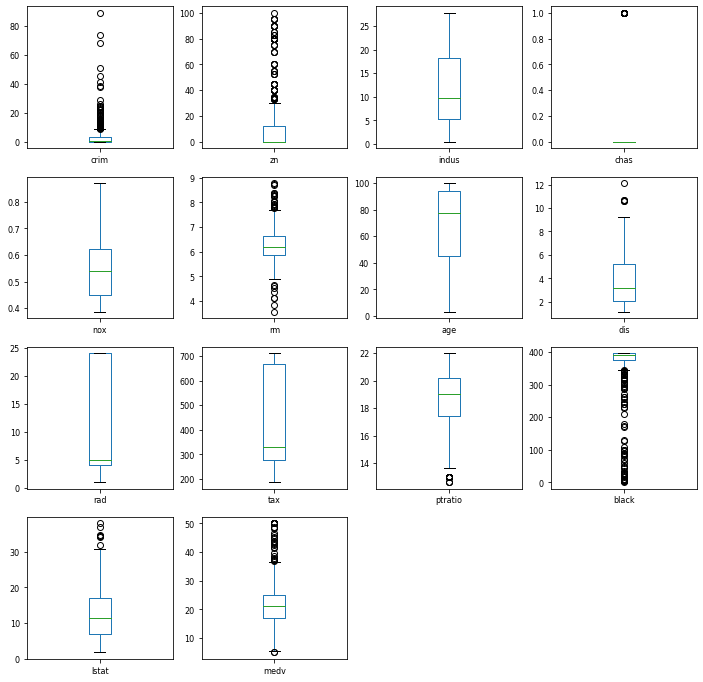

In [155]:
df.plot(kind='box' , subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

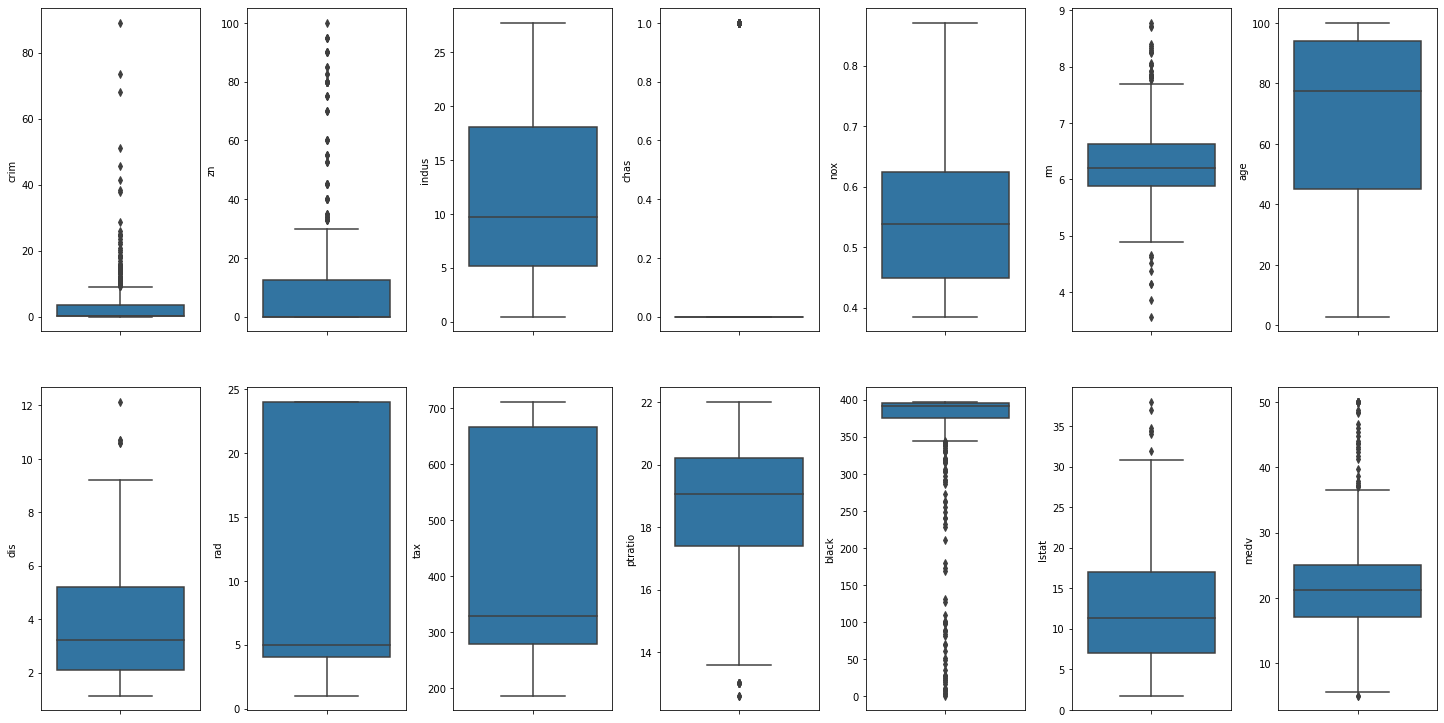

In [156]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

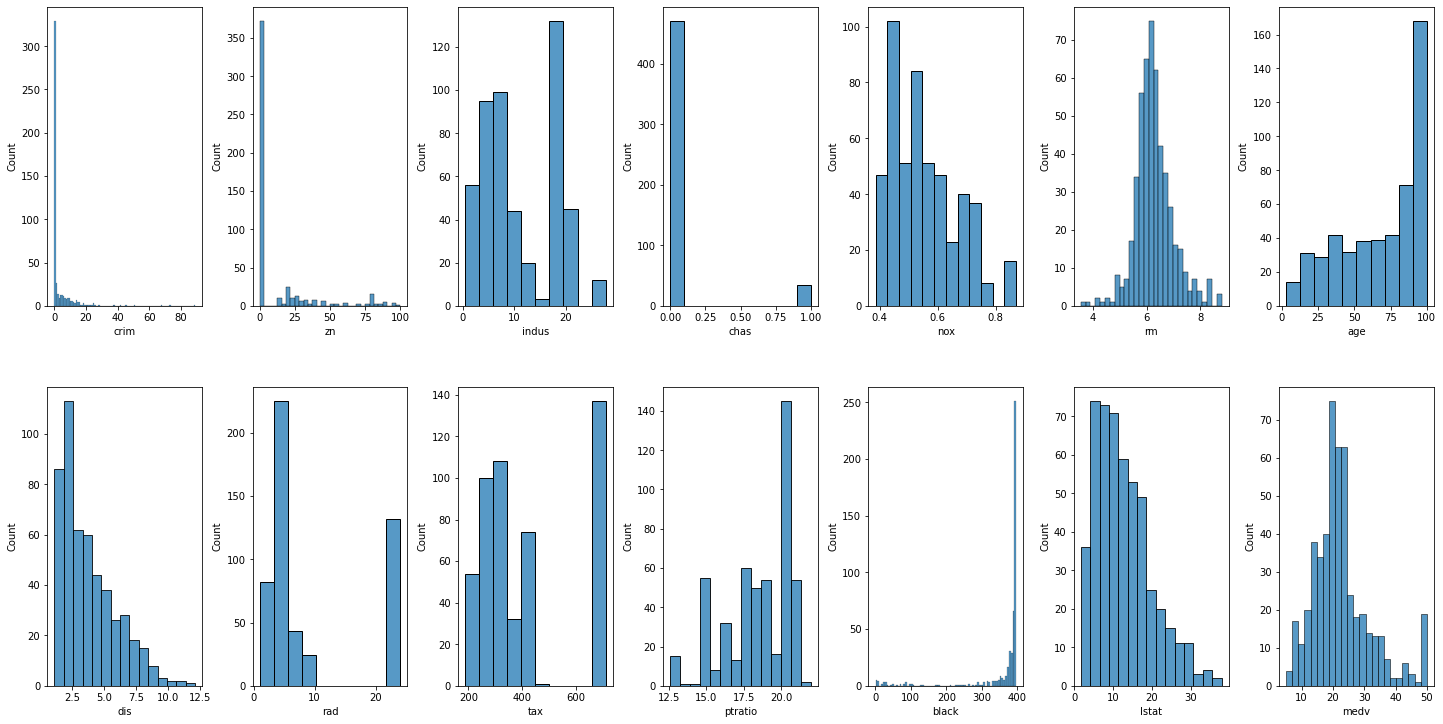

In [157]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

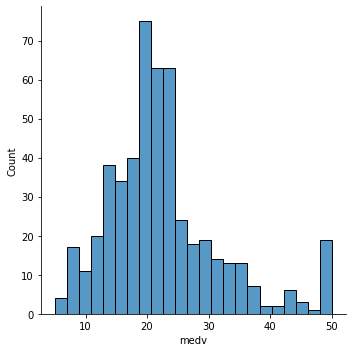

In [158]:
sns.displot(df['medv'])

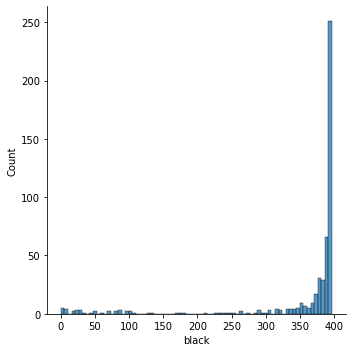

In [159]:
sns.displot(df['black'])

In [160]:
#Min-Max Normalization

cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

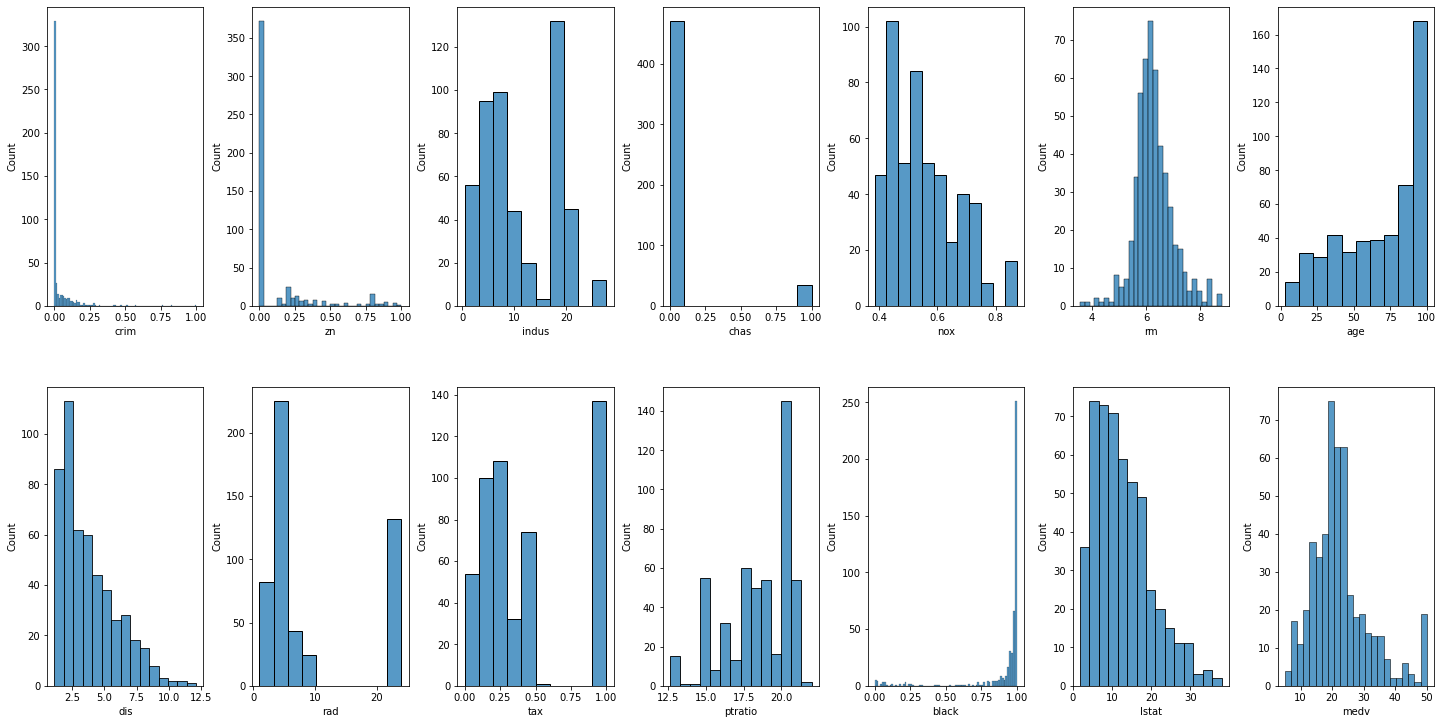

In [161]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [162]:
# Standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [163]:
for col in cols:
    df[col] = scaled_cols[col]

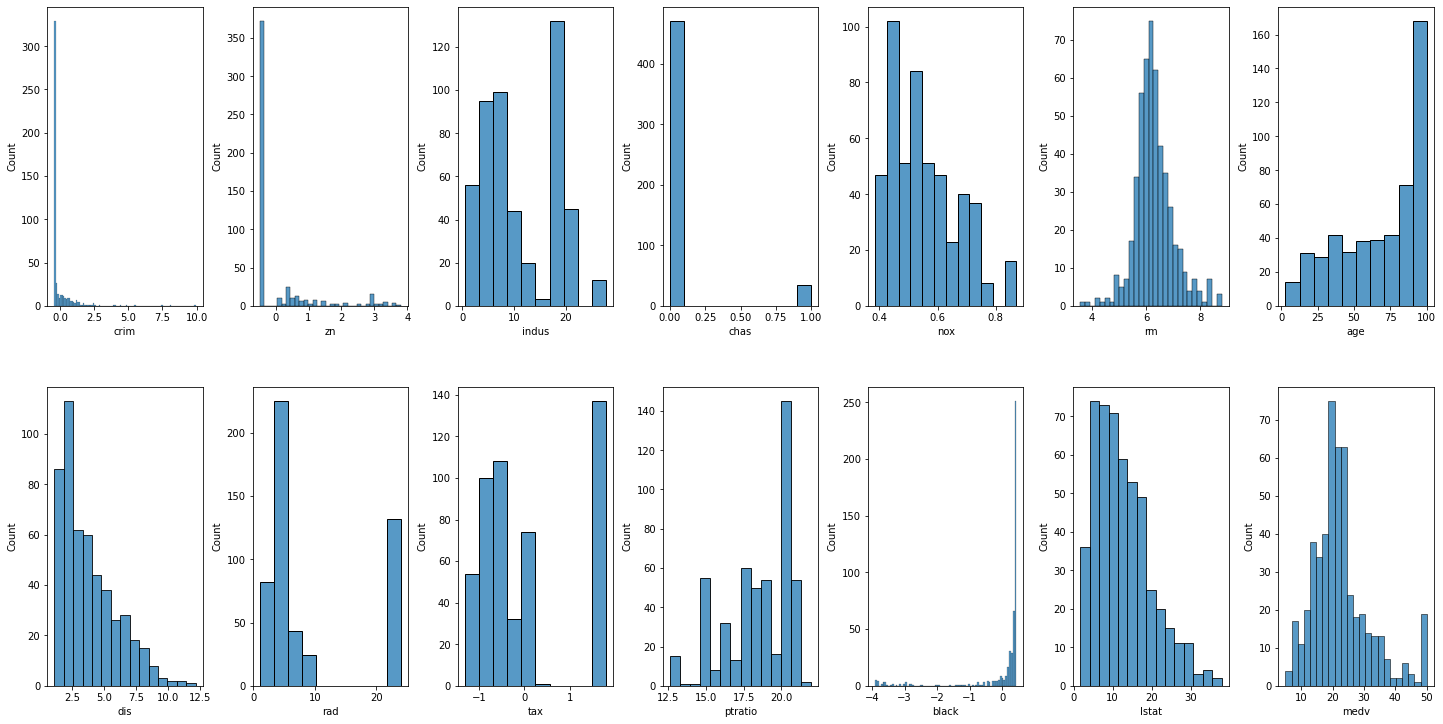

In [164]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

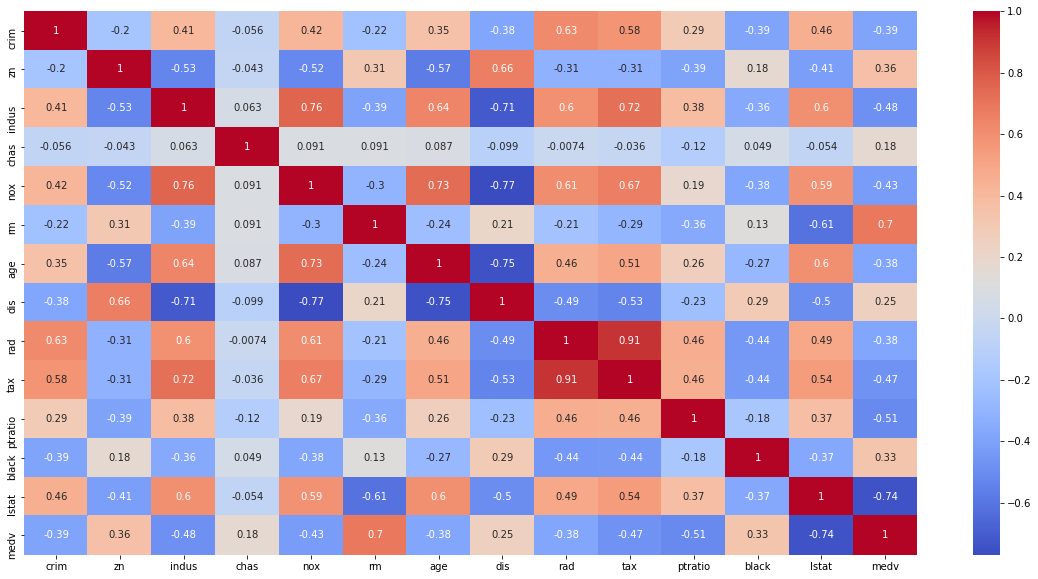

In [165]:
#Correlation matrix

corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

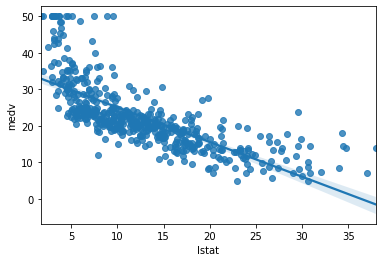

In [166]:
sns.regplot(y=df['medv'], x=df['lstat'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

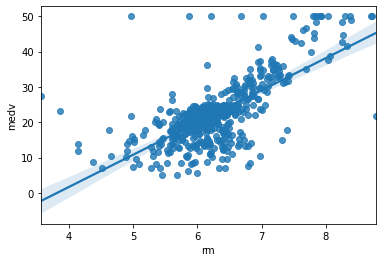

In [167]:
sns.regplot(y=df['medv'], x=df['rm'])

In [168]:
# Input split
X = df.drop(columns=['medv', 'rad'], axis=1)
y = df['medv']

In [169]:
# Model Training

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("model report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('cv score:', cv_score)

model report
MSE: 23.87100506736489
cv score: 35.58136621076922


<AxesSubplot:title={'center':'Model Coefficients'}>

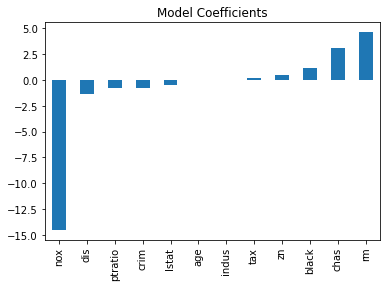

In [170]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

model report
MSE: 10.06795275590551
cv score: 40.05605610561056


<AxesSubplot:title={'center':'Feature Importance'}>

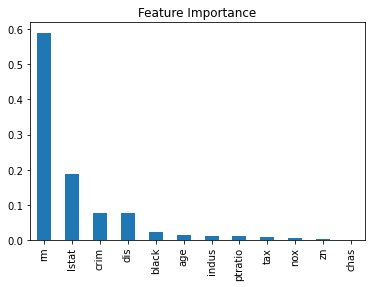

In [171]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

model report
MSE: 11.153163511811028
cv score: 21.321336056979217


<AxesSubplot:title={'center':'Feature Importance'}>

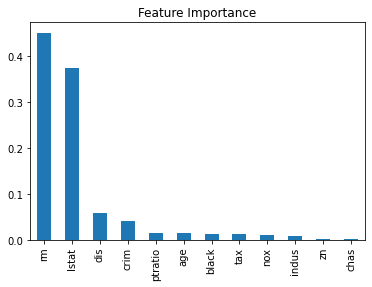

In [172]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

model report
MSE: 10.441994779527565
cv score: 19.94215373816733


<AxesSubplot:title={'center':'Feature Importance'}>

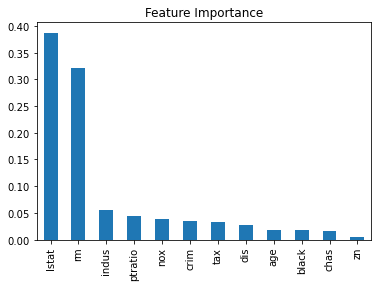

In [173]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

model report
MSE: 10.229776363874551
cv score: 18.766198044819188


<AxesSubplot:title={'center':'Feature Importance'}>

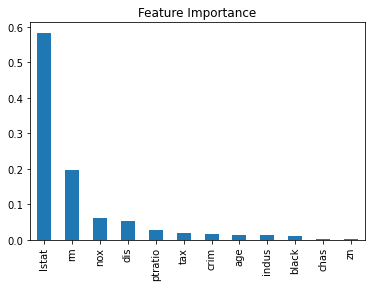

In [174]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')